In [1]:
import cv2
import pandas as pd
import torch
from torch import optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from torchsummary import summary
import random
from model import *
from data_processing import *
from utils import *
from segmentation import *
from classify_background import *

%load_ext autoreload
%autoreload 2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
original_train_path = './data/train/'
original_test_path = './data/test/'
train_path = './preprocessed_data/downsampled/train/'
test_path = './preprocessed_data/downsampled/test/'
cropped_path = './data/cropped/train/'

torch.manual_seed(42)
random.seed(42)
np.random.seed(42)

# DOWNSAMPLE DATA

In [55]:
downsample_images(original_train_path, train_path)
downsample_images(original_test_path, test_path)

# CROP AND SAVE IMAGES

In [74]:
# load all train images
# TODO: once classify background fct is ready for downsampled image -> use this instead of manual folders
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)
total_coins = 1
for root, dirs, files in os.walk(train_path + 'neutral'):
    for i, file in enumerate(files):
        if file.endswith('.JPG'):
            # construct path to the image file
            file_path = os.path.join(root, file)
            im = cv2.imread(file_path, cv2.IMREAD_COLOR)
            cropped_img = detect_and_crop_coins(np.array(im), "neutral", display_cropped=False)
            for j, cropped_img in enumerate(cropped_img):
                output_path = os.path.join(cropped_path, f'{total_coins}.png')
                cv2.imwrite(output_path, cropped_img)
                total_coins += 1
                print(f'Saved cropped image to {output_path}')

Saved cropped image to ./data/cropped/train/1.png
Saved cropped image to ./data/cropped/train/2.png
Saved cropped image to ./data/cropped/train/3.png
Saved cropped image to ./data/cropped/train/4.png
Saved cropped image to ./data/cropped/train/5.png
Saved cropped image to ./data/cropped/train/6.png
Saved cropped image to ./data/cropped/train/7.png
Saved cropped image to ./data/cropped/train/8.png
Saved cropped image to ./data/cropped/train/9.png
Saved cropped image to ./data/cropped/train/10.png
Saved cropped image to ./data/cropped/train/11.png
Saved cropped image to ./data/cropped/train/12.png
Saved cropped image to ./data/cropped/train/13.png
Saved cropped image to ./data/cropped/train/14.png
Saved cropped image to ./data/cropped/train/15.png
Saved cropped image to ./data/cropped/train/16.png
Saved cropped image to ./data/cropped/train/17.png
Saved cropped image to ./data/cropped/train/18.png
Saved cropped image to ./data/cropped/train/19.png
Saved cropped image to ./data/cropped/tr

In [75]:
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)
for root, dirs, files in os.walk(train_path + 'noisy'):
    for file in files:
        if file.endswith('.JPG'):
            # construct path to the image file
            file_path = os.path.join(root, file)
            im = cv2.imread(file_path, cv2.IMREAD_COLOR)
            cropped_img = detect_and_crop_coins(np.array(im), "noisy", display_cropped=False)
            for i, cropped_img in enumerate(cropped_img):
                output_path = os.path.join(cropped_path, f'{total_coins}.png')
                cv2.imwrite(output_path, cropped_img)
                total_coins += 1
                print(f'Saved cropped image to {output_path}')

Saved cropped image to ./data/cropped/train/169.png
Saved cropped image to ./data/cropped/train/170.png
Saved cropped image to ./data/cropped/train/171.png
Saved cropped image to ./data/cropped/train/172.png
Saved cropped image to ./data/cropped/train/173.png
Saved cropped image to ./data/cropped/train/174.png
Saved cropped image to ./data/cropped/train/175.png
Saved cropped image to ./data/cropped/train/176.png
Saved cropped image to ./data/cropped/train/177.png
Saved cropped image to ./data/cropped/train/178.png
Saved cropped image to ./data/cropped/train/179.png
Saved cropped image to ./data/cropped/train/180.png
Saved cropped image to ./data/cropped/train/181.png
Saved cropped image to ./data/cropped/train/182.png
Saved cropped image to ./data/cropped/train/183.png
Saved cropped image to ./data/cropped/train/184.png
Saved cropped image to ./data/cropped/train/185.png
Saved cropped image to ./data/cropped/train/186.png
Saved cropped image to ./data/cropped/train/187.png
Saved croppe

In [76]:
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)
for root, dirs, files in os.walk(train_path + 'hand'):
    for file in files:
        if file.endswith('.JPG'):
            # construct path to the image file
            file_path = os.path.join(root, file)
            im = cv2.imread(file_path, cv2.IMREAD_COLOR)
            cropped_img = detect_and_crop_coins(np.array(im), "hand", display_cropped=False)
            for i, cropped_img in enumerate(cropped_img):
                output_path = os.path.join(cropped_path, f'{total_coins}.png')
                cv2.imwrite(output_path, cropped_img)
                total_coins += 1
                print(f'Saved cropped image to {output_path}')

Saved cropped image to ./data/cropped/train/323.png
Saved cropped image to ./data/cropped/train/324.png
Saved cropped image to ./data/cropped/train/325.png
Saved cropped image to ./data/cropped/train/326.png
Saved cropped image to ./data/cropped/train/327.png
Saved cropped image to ./data/cropped/train/328.png
Saved cropped image to ./data/cropped/train/329.png
Saved cropped image to ./data/cropped/train/330.png
Saved cropped image to ./data/cropped/train/331.png
Saved cropped image to ./data/cropped/train/332.png
Saved cropped image to ./data/cropped/train/333.png
Saved cropped image to ./data/cropped/train/334.png
Saved cropped image to ./data/cropped/train/335.png
Saved cropped image to ./data/cropped/train/336.png
Saved cropped image to ./data/cropped/train/337.png
Saved cropped image to ./data/cropped/train/338.png
Saved cropped image to ./data/cropped/train/339.png
Saved cropped image to ./data/cropped/train/340.png
Saved cropped image to ./data/cropped/train/341.png
Saved croppe

At this stage individual coins were manually labeled into the three classes: CHF, EUR, OOD

# LOAD LABELS

In [77]:
currency_labels = pd.read_csv('./data/CHF_EUR_OOD_labels.csv', sep=';', index_col=0)
currency_labels

,CHF,EUR,OOD
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
...,...,...,...
376,0,0,1
377,0,1,0
378,1,0,0
379,0,0,1


In [63]:
# pre-process images to input to the model
"""transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])"""
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),  # Resize to match model's input size
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize pixel values, based on imagenet
])

In [79]:
train_images = []
labels_list = [] # create a list of labels that are in the same order as the train images
for root, dirs, files in os.walk(cropped_path):
    for file in files:
        # construct path to the image file
        file_path = os.path.join(root, file)
        im = cv2.imread(file_path, cv2.IMREAD_COLOR)
        #im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        if im is not None:
            img_id = file[:-4]
            label = currency_labels.loc[int(img_id)].values
            temp = preprocess(im).unsqueeze(0)
            temp = temp.reshape([3, 224, 224])
            train_images.append(temp)
            labels_list.append(torch.tensor(label))

# CREATE DATASET

In [80]:
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)

data = TensorDataset(torch.tensor(np.array(labels_list), dtype=torch.float32), torch.tensor(np.array(train_images)))
train_size = int(0.75 * len(data))
val_size = len(data) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(data, [train_size, val_size])

# TRAIN MODEL

In [85]:
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)
model = torchvision.models.alexnet(weights='IMAGENET1K_V1')
# model = torchvision.models.efficientnet_b0(weights='IMAGENET1K_V1')
# model = torchvision.models.resnet50(weights='IMAGENET1K_V2') #-> similar performance to alexnet but take 44min to train
# freeze all parameters (except classification layer)
"""for param in model.parameters():
    param.requires_grad = False"""

# replace last layer by classifier with 3 outputs (all possible labels)
num_ftrs = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(num_ftrs, 3)
# num_ftrs = model.fc.in_features
# model.fc = nn.Linear(num_ftrs, 3)

model = model.to(device)
criterion = nn.CrossEntropyLoss()
# only optimise last layer (classifier)
optimizer_conv = optim.SGD(model.classifier.parameters(), lr=0.0005, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
model, train_losses, val_losses, train_acc, val_acc, train_f1, val_f1, preds = \
    train_model(model, criterion, optimizer_conv, exp_lr_scheduler, train_dataset, val_dataset, device, num_epochs=21, batch_size=6)

Epoch 0/20
----------
train Loss: 0.8149
train Accuracy: 0.7158
train F1-score: 0.6214
val Loss: 0.8370
val Accuracy: 0.8737
val F1-score: 0.7798
Epoch 1/20
----------
train Loss: 0.4038
train Accuracy: 0.8491
train F1-score: 0.7523
val Loss: 0.3724
val Accuracy: 0.8947
val F1-score: 0.8357
Epoch 2/20
----------
train Loss: 0.2040
train Accuracy: 0.9228
train F1-score: 0.8743
val Loss: 0.3130
val Accuracy: 0.9263
val F1-score: 0.8706
Epoch 3/20
----------
train Loss: 0.1160
train Accuracy: 0.9579
train F1-score: 0.9398
val Loss: 0.3499
val Accuracy: 0.9263
val F1-score: 0.8706
Epoch 4/20
----------
train Loss: 0.1270
train Accuracy: 0.9509
train F1-score: 0.9186
val Loss: 0.3166
val Accuracy: 0.8842
val F1-score: 0.7853
Epoch 5/20
----------
train Loss: 0.0736
train Accuracy: 0.9789
train F1-score: 0.9547
val Loss: 0.3536
val Accuracy: 0.9158
val F1-score: 0.8526
Epoch 6/20
----------
train Loss: 0.0776
train Accuracy: 0.9825
train F1-score: 0.9721
val Loss: 0.3555
val Accuracy: 0.9158

In [86]:
summary(model, train_dataset[0][1].shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [88]:
torch.save(model.state_dict(), './models/classifier_class3_b6_lr5e4_step7_epoch17_split0.75')

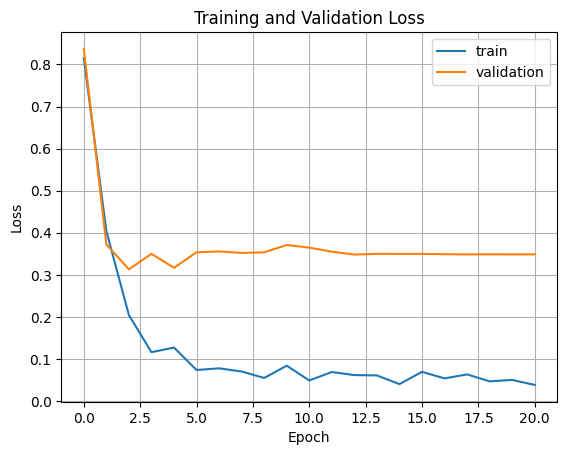

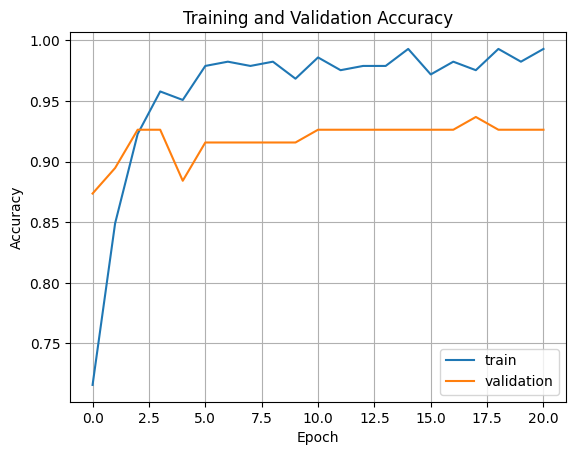

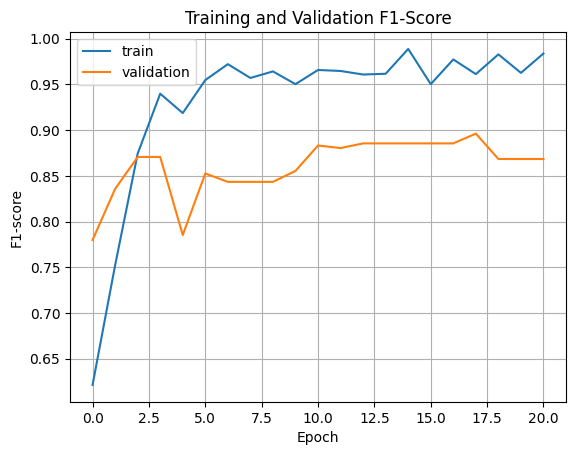

In [87]:
plot_metric(train_losses, val_losses, 'Training and Validation Loss', 'Loss')
plot_metric(train_acc, val_acc, 'Training and Validation Accuracy', 'Accuracy')
plot_metric(train_f1, val_f1, 'Training and Validation F1-Score', 'F1-score')

# CROSS VALIDATION

In [83]:
"""best_lr, results = cross_validate_learning_rate(
    criterion=criterion,
    optimizer_class=optim.SGD,
    scheduler_class=lr_scheduler.StepLR,
    data=train_dataset,
    device=device,
    num_epochs=11,
    batch_size=6,
    lr_candidates=[0.01, 0.005, 0.002, 0.001, 0.0008, 0.0005, 0.0002, 0.0001, 0.00005],
    num_folds=5,
    verbose=True
)"""

Computing F1 score for learning-rate 0.01
Training complete in 3m 57s
Best val F1_score: 0.556818 at epoch: 5
Training complete in 4m 0s
Best val F1_score: 0.564935 at epoch: 2
Training complete in 4m 5s
Best val F1_score: 0.639851 at epoch: 5


KeyboardInterrupt: 

# EVALUATION ON TEST SET

In [89]:
# load test data + detect background
neutral_images = []
neutral_ids = []
noisy_images = []
noisy_ids = []
hand_images = []
hand_ids = []
model.load_state_dict(torch.load('./models/classifier_class3_b6_lr5e4_step7_epoch17_split0.75'))
model.eval()
#TODO: when background on downsamples -> use it here
for root, dirs, files in os.walk('./preprocessed_data/downsampled/test/neutral'):
#for root, dirs, files in os.walk('./data/test'):
    for file in files:
        if file.endswith('.JPG'):
            # construct path to the image file
            file_path = os.path.join(root, file)
            im = cv2.imread(file_path, cv2.IMREAD_COLOR)
            img_id = file[:-4]
            #background = classify_background(im) # TODO: ADD THIS FUNCTION
            background = 'neutral'
            if background == 'neutral':
                neutral_images.append(im)
                neutral_ids.append(img_id)
            elif background == 'noisy':
                noisy_images.append(im)
                noisy_ids.append(img_id)
            elif background == 'hand':
                hand_images.append(im)
                hand_ids.append(img_id)

In [90]:
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),  # Resize to match model's input size
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize pixel values, based on imagenet
])

In [91]:
predictions = {}
test = []
model.eval()
for i, img in enumerate(neutral_images):
    outputs = []
    print('Processing image ', i)
    cropped_images = detect_and_crop_coins(np.array(img), 'neutral', display_cropped=False) # returns a list of coins images
    # TODO: here have np.zeros(16) instead
    pred = np.zeros(3)
    if len(cropped_images) != 0:
        for coin in cropped_images:
            coin = preprocess(coin)
            coin = coin.unsqueeze(0)
            with torch.no_grad():
                outputs = model(coin)
            output = torch.argmax(outputs) # index 0 -> CHF, index 1 -> EUR, index 2 -> OOD
            #TODO: here add prediction of how much the coin is
            pred[output] += 1 # add the coin to the image prediction
    else:
        print(f'no coins detected in image {i}')

    predictions[neutral_ids[i]] = pred

Processing image  0
Processing image  1
Processing image  2
Processing image  3
Processing image  4
Processing image  5
Processing image  6
Processing image  7
Processing image  8
Processing image  9
Processing image  10
Processing image  11
Processing image  12
Processing image  13
Processing image  14


KeyboardInterrupt: 

In [92]:
predictions

{'L0000001': array([6., 4., 0.]),
 'L0000003': array([4., 3., 1.]),
 'L0000004': array([4., 2., 0.]),
 'L0000005': array([7., 1., 0.]),
 'L0000006': array([6., 0., 2.]),
 'L0000010': array([2., 2., 1.]),
 'L0000011': array([4., 3., 1.]),
 'L0000012': array([3., 3., 0.]),
 'L0000013': array([1., 3., 1.]),
 'L0000014': array([4., 1., 0.]),
 'L0000015': array([1., 4., 0.]),
 'L0000017': array([5., 2., 0.]),
 'L0000020': array([2., 2., 2.]),
 'L0000023': array([6., 4., 1.])}

In [27]:
model.eval()
for i, img in enumerate(noisy_images):
    outputs = []
    print('Processing image ', i)
    cropped_images = detect_and_crop_coins(np.array(img), 'noisy', display_cropped=True) # returns a list of coins images
    pred = np.zeros(3)
    if len(cropped_images) != 0:
        for coin in cropped_images:
            coin = preprocess(coin)
            coin = coin.unsqueeze(0)
            with torch.no_grad():
                outputs = model(coin)
            output = torch.argmax(outputs) # index 0 -> CHF, index 1 -> EUR, index 2 -> OOD
            pred[output] += 1 # add the coin to the image prediction
    else:
        print(f'no coins detected in image {i}')

    predictions[noisy_ids[i]] = pred

Processing image  0
Processing image  1
Processing image  2
Processing image  3
Processing image  4
Processing image  5
Processing image  6
Processing image  7
Processing image  8
Processing image  9
Processing image  10
Processing image  11
Processing image  12
Processing image  13
Processing image  14
Processing image  15
Processing image  16
Processing image  17
Processing image  18
Processing image  19
Processing image  20
Processing image  21
Processing image  22
Processing image  23
Processing image  24
Processing image  25
Processing image  26
Processing image  27
Processing image  28
Processing image  29
Processing image  30
Processing image  31
Processing image  32
Processing image  33
Processing image  34
Processing image  35
Processing image  36
Processing image  37
Processing image  38
Processing image  39
Processing image  40
Processing image  41
Processing image  42
Processing image  43
Processing image  44
Processing image  45
Processing image  46
Processing image  47
Pr

In [28]:
model.eval()
for i, img in enumerate(hand_images):
    outputs = []
    print('Processing image ', i)
    cropped_images = detect_and_crop_coins(np.array(img), 'hand',
                                           display_cropped=False)  # returns a list of coins images
    pred = np.zeros(3)
    if len(cropped_images) != 0:
        for coin in cropped_images:
            coin = preprocess(coin)
            coin = coin.unsqueeze(0)
            with torch.no_grad():
                outputs = model(coin)
            output = torch.argmax(outputs)  # index 0 -> CHF, index 1 -> EUR, index 2 -> OOD
            pred[output] += 1  # add the coin to the image prediction
    else:
        print(f'no coins detected in image {i}')

    predictions[hand_ids[i]] = pred

Processing image  0
No circles detected
no coins detected in image 0
Processing image  1
No circles detected
no coins detected in image 1
Processing image  2
Processing image  3
No circles detected
no coins detected in image 3
Processing image  4
Processing image  5
Processing image  6
Processing image  7
No circles detected
no coins detected in image 7
Processing image  8
No circles detected
no coins detected in image 8
Processing image  9
Processing image  10
Processing image  11
Processing image  12
Processing image  13
No circles detected
no coins detected in image 13
Processing image  14
No circles detected
no coins detected in image 14
Processing image  15
No circles detected
no coins detected in image 15
Processing image  16
No circles detected
no coins detected in image 16
Processing image  17
No circles detected
no coins detected in image 17
Processing image  18
No circles detected
no coins detected in image 18
Processing image  19
Processing image  20
Processing image  21
No 

In [29]:
predictions

{'L0000001': array([23.,  0.,  1.]),
 'L0000003': array([19.,  0.,  1.]),
 'L0000004': array([15.,  0.,  2.]),
 'L0000005': array([15.,  0.,  6.]),
 'L0000006': array([32.,  0.,  4.]),
 'L0000010': array([8., 1., 3.]),
 'L0000011': array([30.,  0.,  4.]),
 'L0000012': array([13.,  0.,  1.]),
 'L0000013': array([16.,  0.,  0.]),
 'L0000014': array([12.,  0.,  0.]),
 'L0000015': array([8., 0., 0.]),
 'L0000017': array([14.,  0.,  2.]),
 'L0000020': array([14.,  0.,  3.]),
 'L0000023': array([31.,  0.,  7.]),
 'L0000035': array([3., 0., 0.]),
 'L0000038': array([4., 0., 2.]),
 'L0000041': array([3., 3., 0.]),
 'L0000042': array([9., 2., 2.]),
 'L0000043': array([20.,  0.,  3.]),
 'L0000046': array([15.,  1.,  2.]),
 'L0000048': array([34.,  0.,  4.]),
 'L0000049': array([16.,  0.,  5.]),
 'L0000050': array([3., 0., 1.]),
 'L0000052': array([31.,  0.,  3.]),
 'L0000053': array([24.,  0.,  3.]),
 'L0000057': array([17.,  0.,  3.]),
 'L0000064': array([43.,  0.,  7.]),
 'L0000065': array([8.